# **Unified Mentors Project-4 AtliQ Hospitality Analysis**

## **Domain:- Travel & Tourism**

### **Author:- Gowtham Vinayagamurthy**

### **IDE:- Jupyter Notebook**

### **Problem Statement**
Atliq Grands owns multiple five-star hotels across India. They have been in the hospitality 
industry for the past 20 years. Due to strategic moves from other competitors and ineffectiv 
decision-making in management, Atliq Grands are losing its market share and revenue in t e
luxury/business hotels category. As a strategic move, the managing director of Atliq Gra ds
wanted to incorporate “Business and Data Intelligence” in order to regain their market s are
and rev nue.
However, they do not have an in-house data analytics team to provide them with these
insights. Their revenue management team had decided to hire a 3rd party service prov der to
provide them with insights from their historicl data.


In [1]:
# To import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the required data
dim_date = pd.read_csv('dim_date.csv')
dim_hotels = pd.read_csv('dim_hotels.csv')
dim_rooms = pd.read_csv('dim_rooms.csv')
fact_aggregated_bookings = pd.read_csv('fact_aggregated_bookings.csv')
fact_bookings = pd.read_csv('fact_bookings.csv')

In [3]:
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [4]:
dim_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [5]:
dim_date.describe()

,date,mmm yy,week no,day_type
count,92,92,92,92
unique,92,3,14,2
top,01-May-22,May 22,W 19,weekeday
freq,1,31,7,65


In [6]:
dim_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes


In [7]:
dim_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [8]:
dim_hotels.describe()

,property_id
count,25.000000
mean,18040.640000
std,1122.436371
min,16558.000000
25%,17558.000000
50%,17564.000000
75%,18563.000000
max,19563.000000


In [9]:
dim_rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-null      object
 1   room_class  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


In [10]:
dim_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [11]:
dim_rooms.describe()

,room_id,room_class
count,4,4
unique,4,4
top,RT1,Standard
freq,1,1


In [12]:
fact_aggregated_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 359.5+ KB


In [13]:
fact_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [14]:
fact_aggregated_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9200.000000
mean,18040.640000,14.629348,25.280000
std,1099.818325,7.591770,11.440971
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,43.000000,50.000000


In [15]:
fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


In [16]:
fact_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [17]:
fact_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


## **Cleaning, Filtering & Transforming Data**

In [18]:
# Convert 'date' in dim_date to datetime in the format YYYY-MM-DD
dim_date['date'] = pd.to_datetime(dim_date['date'], format='%d-%b-%y', errors='coerce')

In [19]:
# Verify conversion
print("Sample converted date values in dim_date:")
print(dim_date['date'].head(10))


Sample converted date values in dim_date:
0   2022-05-01
1   2022-05-02
2   2022-05-03
3   2022-05-04
4   2022-05-05
5   2022-05-06
6   2022-05-07
7   2022-05-08
8   2022-05-09
9   2022-05-10
Name: date, dtype: datetime64[ns]


In [20]:
# Merge fact_bookings with dim_hotels
combined_data = pd.merge(fact_bookings, dim_hotels, on='property_id', how='left')
print("After merging fact_bookings with dim_hotels:")
print(combined_data.head())

After merging fact_bookings with dim_hotels:
         booking_id  property_id booking_date check_in_date checkout_date  \
0  May012216558RT11        16558   2022-04-27    2022-05-01    2022-05-02   
1  May012216558RT12        16558   2022-04-30    2022-05-01    2022-05-02   
2  May012216558RT13        16558   2022-04-28    2022-05-01    2022-05-04   
3  May012216558RT14        16558   2022-04-28    2022-05-01    2022-05-02   
4  May012216558RT15        16558   2022-04-27    2022-05-01    2022-05-02   

   no_guests room_category booking_platform  ratings_given booking_status  \
0          3           RT1    direct online            1.0    Checked Out   
1          2           RT1           others            NaN      Cancelled   
2          2           RT1          logtrip            5.0    Checked Out   
3          2           RT1           others            NaN      Cancelled   
4          4           RT1    direct online            5.0    Checked Out   

   revenue_generated  revenue

In [21]:
# Merge with dim_rooms using room_category to room_id
combined_data = pd.merge(combined_data, dim_rooms, left_on='room_category', right_on='room_id', how='left')
print("After merging with dim_rooms:")
print(combined_data.head())

After merging with dim_rooms:
         booking_id  property_id booking_date check_in_date checkout_date  \
0  May012216558RT11        16558   2022-04-27    2022-05-01    2022-05-02   
1  May012216558RT12        16558   2022-04-30    2022-05-01    2022-05-02   
2  May012216558RT13        16558   2022-04-28    2022-05-01    2022-05-04   
3  May012216558RT14        16558   2022-04-28    2022-05-01    2022-05-02   
4  May012216558RT15        16558   2022-04-27    2022-05-01    2022-05-02   

   no_guests room_category booking_platform  ratings_given booking_status  \
0          3           RT1    direct online            1.0    Checked Out   
1          2           RT1           others            NaN      Cancelled   
2          2           RT1          logtrip            5.0    Checked Out   
3          2           RT1           others            NaN      Cancelled   
4          4           RT1    direct online            5.0    Checked Out   

   revenue_generated  revenue_realized prope

In [22]:
# Convert booking_date and check_in_date to datetime
combined_data['booking_date'] = pd.to_datetime(combined_data['booking_date'], format='%Y-%m-%d', errors='coerce')
combined_data['check_in_date'] = pd.to_datetime(combined_data['check_in_date'], errors='coerce')

In [23]:
# Convert check_in_date in fact_aggregated_bookings to datetime
fact_aggregated_bookings['check_in_date'] = pd.to_datetime(fact_aggregated_bookings['check_in_date'], format='%d-%b-%y', errors='coerce')

In [24]:
# Check the data types to ensure they match
print(combined_data.dtypes)
print(fact_aggregated_bookings.dtypes)

booking_id                   object
property_id                   int64
booking_date         datetime64[ns]
check_in_date        datetime64[ns]
checkout_date                object
no_guests                     int64
room_category                object
booking_platform             object
ratings_given               float64
booking_status               object
revenue_generated             int64
revenue_realized              int64
property_name                object
category                     object
city                         object
room_id                      object
room_class                   object
dtype: object
property_id                     int64
check_in_date          datetime64[ns]
room_category                  object
successful_bookings             int64
capacity                        int64
dtype: object


In [25]:
# Merge with dim_date using booking_date to date
combined_data = pd.merge(combined_data, dim_date, left_on='booking_date', right_on='date', how='left')
print("After merging with dim_date:")
print(combined_data.head())

After merging with dim_date:
         booking_id  property_id booking_date check_in_date checkout_date  \
0  May012216558RT11        16558   2022-04-27    2022-05-01    2022-05-02   
1  May012216558RT12        16558   2022-04-30    2022-05-01    2022-05-02   
2  May012216558RT13        16558   2022-04-28    2022-05-01    2022-05-04   
3  May012216558RT14        16558   2022-04-28    2022-05-01    2022-05-02   
4  May012216558RT15        16558   2022-04-27    2022-05-01    2022-05-02   

   no_guests room_category booking_platform  ratings_given booking_status  \
0          3           RT1    direct online            1.0    Checked Out   
1          2           RT1           others            NaN      Cancelled   
2          2           RT1          logtrip            5.0    Checked Out   
3          2           RT1           others            NaN      Cancelled   
4          4           RT1    direct online            5.0    Checked Out   

   ...  revenue_realized  property_name categ

In [26]:
# Convert date formats in fact_aggregated_bookings
fact_aggregated_bookings['check_in_date'] = pd.to_datetime(fact_aggregated_bookings['check_in_date'], format='%d-%b-%y')

In [27]:
# Merge combined_data with fact_aggregated_bookings
combined_data = pd.merge(combined_data, fact_aggregated_bookings, on=['property_id', 'check_in_date', 'room_category'], how='left')
print("After merging with fact_aggregated_bookings:")
print(combined_data.head())

After merging with fact_aggregated_bookings:
         booking_id  property_id booking_date check_in_date checkout_date  \
0  May012216558RT11        16558   2022-04-27    2022-05-01    2022-05-02   
1  May012216558RT12        16558   2022-04-30    2022-05-01    2022-05-02   
2  May012216558RT13        16558   2022-04-28    2022-05-01    2022-05-04   
3  May012216558RT14        16558   2022-04-28    2022-05-01    2022-05-02   
4  May012216558RT15        16558   2022-04-27    2022-05-01    2022-05-02   

   no_guests room_category booking_platform  ratings_given booking_status  \
0          3           RT1    direct online            1.0    Checked Out   
1          2           RT1           others            NaN      Cancelled   
2          2           RT1          logtrip            5.0    Checked Out   
3          2           RT1           others            NaN      Cancelled   
4          4           RT1    direct online            5.0    Checked Out   

   ...  category   city room_

In [28]:
# After merging with fact_aggregated_bookings
print("Columns after merging with fact_aggregated_bookings:")
print(combined_data.columns)

Columns after merging with fact_aggregated_bookings:
Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized', 'property_name', 'category', 'city', 'room_id',
       'room_class', 'date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity'],
      dtype='object')


In [29]:
# Check for missing values in 'successful_bookings' and 'capacity'
print("Checking missing values in 'successful_bookings' and 'capacity':")
print(combined_data[['successful_bookings', 'capacity']].isnull().sum())

Checking missing values in 'successful_bookings' and 'capacity':
successful_bookings    0
capacity               0
dtype: int64


In [30]:
# Check the merge keys and DataFrames
print("Unique property_ids in fact_bookings:")
print(fact_bookings['property_id'].unique())
print("Unique property_ids in dim_hotels:")
print(dim_hotels['property_id'].unique())
print("Unique room_category in fact_bookings:")
print(fact_bookings['room_category'].unique())
print("Unique room_id in dim_rooms:")
print(dim_rooms['room_id'].unique())

Unique property_ids in fact_bookings:
[16558 16559 16560 16561 16562 16563 17558 17559 17560 17561 17562 17563
 18558 18559 18560 18561 18562 18563 19558 19559 19560 19561 19562 19563
 17564]
Unique property_ids in dim_hotels:
[16558 16559 16560 16561 16562 16563 17558 17559 17560 17561 17562 17563
 18558 18559 18560 18561 18562 18563 19558 19559 19560 19561 19562 19563
 17564]
Unique room_category in fact_bookings:
['RT1' 'RT2' 'RT3' 'RT4']
Unique room_id in dim_rooms:
['RT1' 'RT2' 'RT3' 'RT4']


In [31]:
# Check for missing values in the original data
print("Missing values in fact_aggregated_bookings:")
print(fact_aggregated_bookings[['successful_bookings', 'capacity']].isnull().sum())
print("Missing values in dim_rooms:")
print(dim_rooms[['room_id']].isnull().sum())

Missing values in fact_aggregated_bookings:
successful_bookings    0
capacity               0
dtype: int64
Missing values in dim_rooms:
room_id    0
dtype: int64


In [32]:
# Display combined data
print("First few rows of combined_data after merge:")
print(combined_data.head(10))

First few rows of combined_data after merge:
          booking_id  property_id booking_date check_in_date checkout_date  \
0   May012216558RT11        16558   2022-04-27    2022-05-01    2022-05-02   
1   May012216558RT12        16558   2022-04-30    2022-05-01    2022-05-02   
2   May012216558RT13        16558   2022-04-28    2022-05-01    2022-05-04   
3   May012216558RT14        16558   2022-04-28    2022-05-01    2022-05-02   
4   May012216558RT15        16558   2022-04-27    2022-05-01    2022-05-02   
5   May012216558RT16        16558   2022-05-01    2022-05-01    2022-05-03   
6   May012216558RT17        16558   2022-04-28    2022-05-01    2022-05-06   
7   May012216558RT18        16558   2022-04-26    2022-05-01    2022-05-03   
8   May012216558RT19        16558   2022-04-30    2022-05-01    2022-05-02   
9  May012216558RT110        16558   2022-04-28    2022-05-01    2022-05-02   

   no_guests room_category booking_platform  ratings_given booking_status  \
0          3       

In [33]:
# Display date range of combined_data
print("Date range of combined_data:")
print(f"From: {combined_data['booking_date'].min()} To: {combined_data['booking_date'].max()}")


Date range of combined_data:
From: 2022-04-07 00:00:00 To: 2022-07-31 00:00:00


In [34]:
# Display date range of dim_date
print("Date range of dim_date:")
print(f"From: {dim_date['date'].min()} To: {dim_date['date'].max()}")

Date range of dim_date:
From: 2022-05-01 00:00:00 To: 2022-07-31 00:00:00


In [35]:
# Dates in combined_data that are before the start of dim_date
early_dates = combined_data[combined_data['booking_date'] < '2022-05-01']['booking_date'].unique()
print("Dates in combined_data before 2022-05-01:")
print(early_dates)

Dates in combined_data before 2022-05-01:
<DatetimeArray>
['2022-04-27 00:00:00', '2022-04-30 00:00:00', '2022-04-28 00:00:00',
 '2022-04-26 00:00:00', '2022-04-29 00:00:00', '2022-04-07 00:00:00',
 '2022-04-10 00:00:00', '2022-04-25 00:00:00', '2022-04-24 00:00:00',
 '2022-04-11 00:00:00', '2022-04-08 00:00:00', '2022-04-12 00:00:00',
 '2022-04-13 00:00:00', '2022-04-09 00:00:00', '2022-04-14 00:00:00',
 '2022-04-15 00:00:00', '2022-04-16 00:00:00', '2022-04-17 00:00:00',
 '2022-04-18 00:00:00', '2022-04-19 00:00:00', '2022-04-20 00:00:00',
 '2022-04-21 00:00:00', '2022-04-22 00:00:00', '2022-04-23 00:00:00']
Length: 24, dtype: datetime64[ns]


In [36]:
# Drop rows where booking_date is before 2022-05-01
combined_data_filtered = combined_data[combined_data['booking_date'] >= '2022-05-01']

In [37]:
# Check for duplicates
print("Number of duplicate rows in combined_data:")
print(combined_data.duplicated().sum())

Number of duplicate rows in combined_data:
0


In [38]:
# Create a copy to avoid SettingWithCopyWarning
combined_data_filtered = combined_data_filtered.copy()

In [39]:
# Handle missing values
mean_rating = combined_data['ratings_given'].mean()
combined_data['ratings_given'] = combined_data['ratings_given'].fillna(mean_rating)

In [40]:
print("Missing values in combined_data_filtered:")
print(combined_data.isnull().sum())

Missing values in combined_data_filtered:
booking_id                0
property_id               0
booking_date              0
check_in_date             0
checkout_date             0
no_guests                 0
room_category             0
booking_platform          0
ratings_given             0
booking_status            0
revenue_generated         0
revenue_realized          0
property_name             0
category                  0
city                      0
room_id                   0
room_class                0
date                   5716
mmm yy                 5716
week no                5716
day_type               5716
successful_bookings       0
capacity                  0
dtype: int64


In [41]:
# Ensure 'successful_bookings' and 'capacity' columns do not have missing values
print("Checking missing values in 'successful_bookings' and 'capacity' after filtering:")
print(combined_data_filtered[['successful_bookings', 'capacity']].isnull().sum())

Checking missing values in 'successful_bookings' and 'capacity' after filtering:
successful_bookings    0
capacity               0
dtype: int64


In [42]:
# Check for remaining missing values
print("Missing values in combined_data_filtered:")
print(combined_data_filtered.isnull().sum())

Missing values in combined_data_filtered:
booking_id                 0
property_id                0
booking_date               0
check_in_date              0
checkout_date              0
no_guests                  0
room_category              0
booking_platform           0
ratings_given          74582
booking_status             0
revenue_generated          0
revenue_realized           0
property_name              0
category                   0
city                       0
room_id                    0
room_class                 0
date                       0
mmm yy                     0
week no                    0
day_type                   0
successful_bookings        0
capacity                   0
dtype: int64


In [43]:
# Summary statistics of combined_data_filtered
print("Summary statistics of combined_data_filtered:")
print(combined_data_filtered.describe())

Summary statistics of combined_data_filtered:
         property_id                   booking_date  \
count  128874.000000                         128874   
mean    18060.156967  2022-06-13 07:44:05.989105408   
min     16558.000000            2022-05-01 00:00:00   
25%     17558.000000            2022-05-22 00:00:00   
50%     17564.000000            2022-06-13 00:00:00   
75%     18563.000000            2022-07-05 00:00:00   
max     19563.000000            2022-07-31 00:00:00   
std      1093.056760                            NaN   

                       check_in_date      no_guests  ratings_given  \
count                         128874  128874.000000   54292.000000   
mean   2022-06-16 18:23:36.937474048       2.033575       3.616960   
min              2022-05-01 00:00:00       1.000000       1.000000   
25%              2022-05-26 00:00:00       1.000000       3.000000   
50%              2022-06-17 00:00:00       2.000000       4.000000   
75%              2022-07-09 00:00:00  

In [44]:
# Define the directory path
output_directory = '/Users/gowth/Documents/!Career/Internship & Online Courses/!Internships/Unified Mentor Internship/Prj-4 AltiQ Hospitability Analysis'

In [45]:
# Create the directory if it does not exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

In [46]:
# Define the full path for the output file
output_path = os.path.join(output_directory, 'combined_atliq_data_filtered.csv')

In [47]:
# Save the combined DataFrame to a CSV file
combined_data_filtered.to_csv(output_path, index=False)
print(f"DataFrame has been saved to CSV at {output_path}.")

DataFrame has been saved to CSV at /Users/gowth/Documents/!Career/Internship & Online Courses/!Internships/Unified Mentor Internship/Prj-4 AltiQ Hospitability Analysis\combined_atliq_data_filtered.csv.


In [48]:
# Define function to filter data
def filter_data(df, city=None, property_name=None, status=None, platform=None, month=None, week=None):
    if city:
        df = df[df['city'] == city]
    if property_name:
        df = df[df['property_name'] == property_name]
    if status:
        df = df[df['booking_status'] == status]
    if platform:
        df = df[df['booking_platform'] == platform]
    if month:
        df = df[df['date'].dt.month == month]
    if week:
        df = df[df['date'].dt.isocalendar().week == week]
    return df

In [49]:
# Applying the filters as an example
filtered_data = filter_data(combined_data_filtered, city='Mumbai', month=7)

In [50]:
# Define function to calculate key performance metrics
def calculate_metrics(df):
    revenue = df['revenue_realized'].sum()
    occupancy = df['successful_bookings'].sum() / df['capacity'].sum() * 100 if df['capacity'].sum() > 0 else 0
    average_rating = df['ratings_given'].mean()
    return revenue, occupancy, average_rating

In [51]:
# Calculate metrics for filtered data
revenue, occupancy, avg_rating = calculate_metrics(filtered_data)
print(f"Revenue: {revenue}")
print(f"Occupancy %: {occupancy}")
print(f"Average Rating: {avg_rating}")

Revenue: 195696112
Occupancy %: 60.59504443612832
Average Rating: 3.6410399257195913


## **Exploratory Data Analysis (EDA) & Data Visualizations**

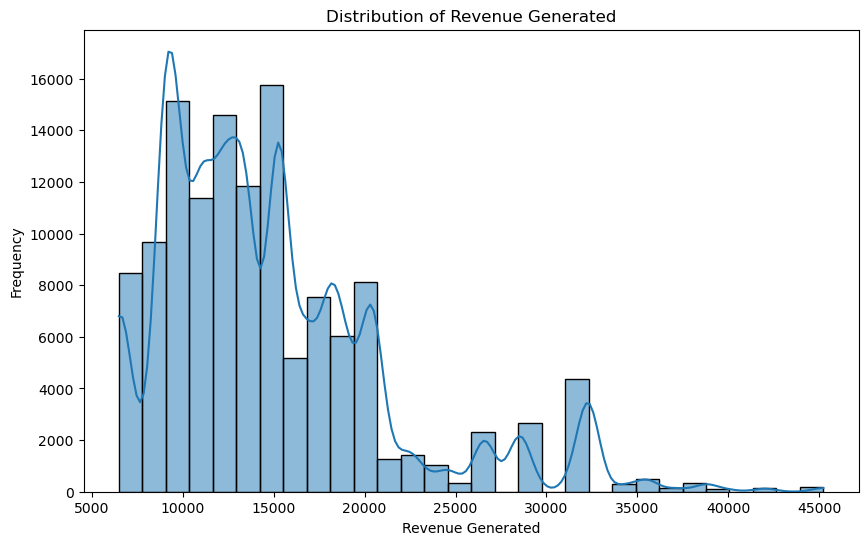

In [52]:
# Example: Distribution of revenue_generated
plt.figure(figsize=(10, 6))
sns.histplot(combined_data_filtered['revenue_generated'], bins=30, kde=True)
plt.title('Distribution of Revenue Generated')
plt.xlabel('Revenue Generated')
plt.ylabel('Frequency')
plt.show()

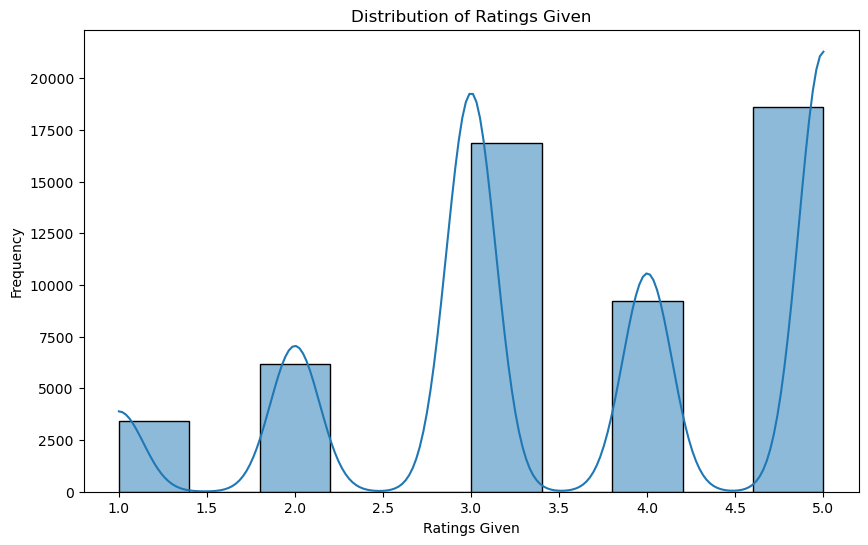

In [53]:
# Example: Ratings Given Distribution
plt.figure(figsize=(10, 6))
sns.histplot(combined_data_filtered['ratings_given'], bins=10, kde=True)
plt.title('Distribution of Ratings Given')
plt.xlabel('Ratings Given')
plt.ylabel('Frequency')
plt.show()

In [54]:
# Revenue, Occupancy %, and Average Rating Cards
def display_metrics(revenue, occupancy, avg_rating):
    print(f"Total Revenue: {revenue}")
    print(f"Occupancy %: {occupancy}")
    print(f"Average Rating: {avg_rating}")

In [55]:
# Display metrics for entire data
revenue, occupancy, avg_rating = calculate_metrics(combined_data)
display_metrics(revenue, occupancy, avg_rating)

Total Revenue: 1708771229
Occupancy %: 61.343673347961015
Average Rating: 3.619003934160154


<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

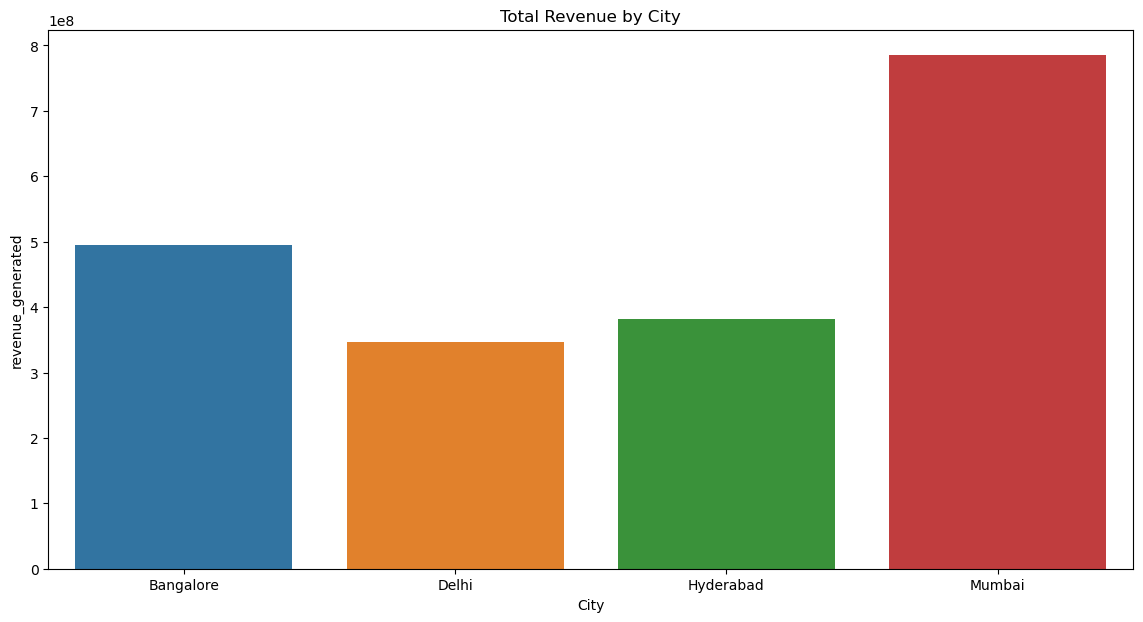

In [56]:
# Revenue by City
city_revenue = combined_data.groupby('city')['revenue_generated'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(data=city_revenue, x='city', y='revenue_generated')
plt.title('Total Revenue by City')
plt.xlabel('City')
plt.ylabel

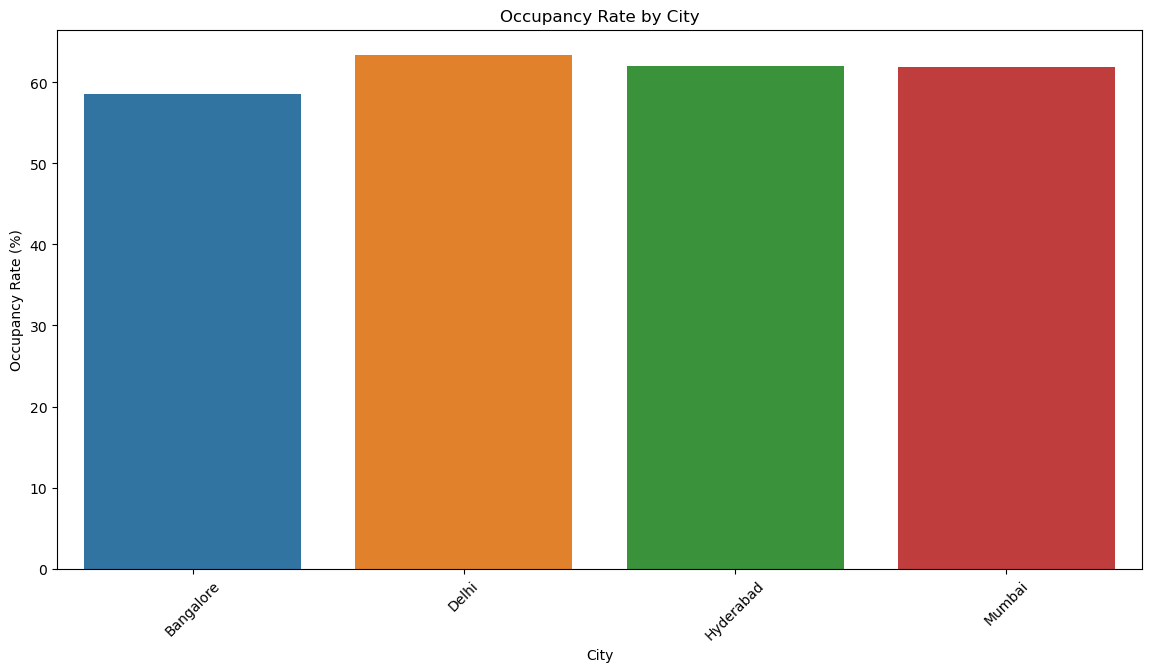

In [57]:
# Compute occupancy by city
city_occupancy = combined_data.groupby('city').agg(
    occupancy_rate=('successful_bookings', lambda x: (x.sum() / combined_data.loc[x.index, 'capacity'].sum()) * 100 if combined_data.loc[x.index, 'capacity'].sum() > 0 else 0)
).reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(data=city_occupancy, x='city', y='occupancy_rate')
plt.title('Occupancy Rate by City')
plt.xlabel('City')
plt.ylabel('Occupancy Rate (%)')
plt.xticks(rotation=45)
plt.show()

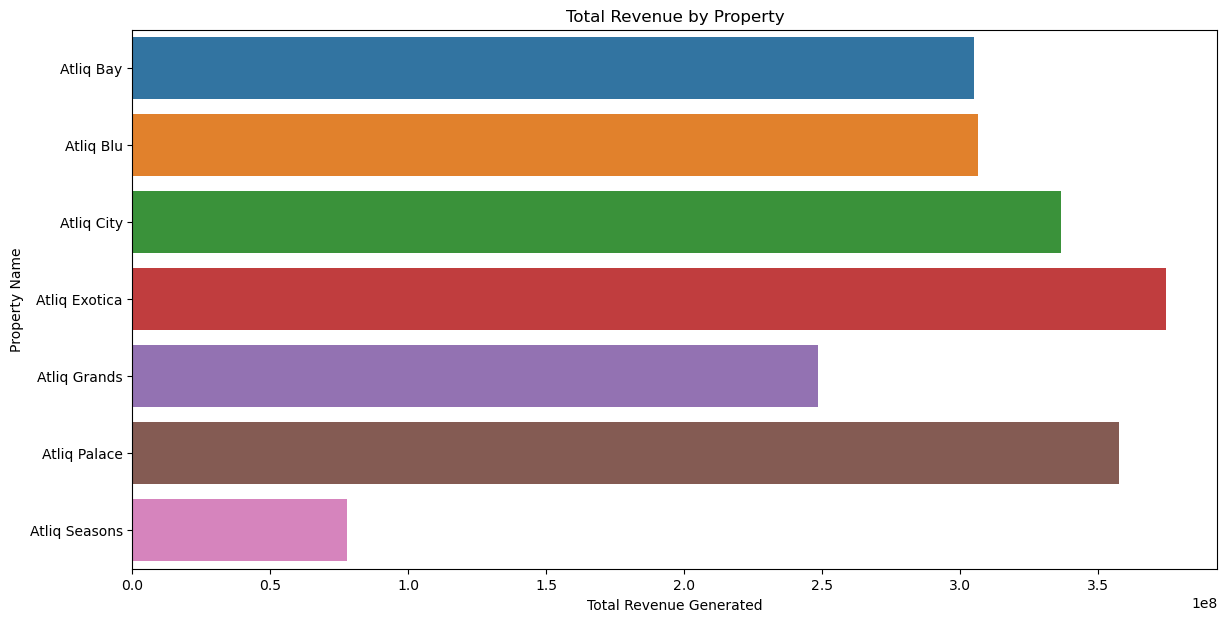

In [58]:
# Revenue by Property
property_revenue = combined_data.groupby('property_name')['revenue_generated'].sum().reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(data=property_revenue, x='revenue_generated', y='property_name', orient='h')
plt.title('Total Revenue by Property')
plt.xlabel('Total Revenue Generated')
plt.ylabel('Property Name')
plt.show()

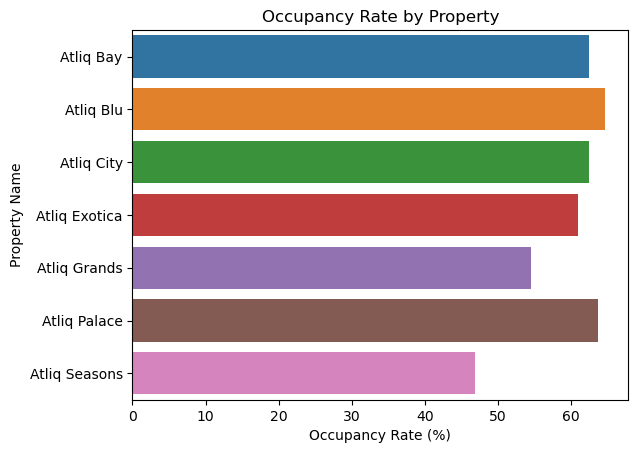

plots for different Visualizations created


In [59]:
# Compute occupancy by property

property_occupancy = combined_data.groupby('property_name').agg(occupancy_rate=('successful_bookings', lambda x: (x.sum() / combined_data.loc[x.index, 'capacity'].sum()) * 100 if combined_data.loc[x.index, 'capacity'].sum() > 0 else 0)).reset_index()
sns.barplot(data=property_occupancy, x='occupancy_rate', y='property_name', orient='h')
plt.title('Occupancy Rate by Property')
plt.xlabel('Occupancy Rate (%)')
plt.ylabel('Property Name')
plt.show()
print("plots for different Visualizations created")